<a href="https://colab.research.google.com/github/JarekRob/CNN/blob/master/CNN_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce


# Part 1

* Downloaded the dataset and visualize the images
* Changed the label to one-hot encodings
* Scale the image pixel values to take between 0 and 1 item




In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
#egzample: X_train: 50000 images, 32 px height, 32 px width, 3 px in depth (RGB)

In [41]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


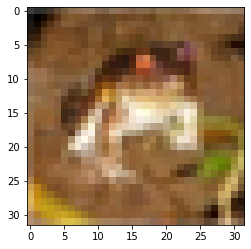

In [42]:
img = plt.imshow(X_train[0])

In [43]:
type(y_train)

numpy.ndarray

In [0]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [45]:
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [46]:
y_test_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [48]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Part 2

In [49]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
  ])

ERROR! Session/line number was not unique in database. History logging moved to new session 70


In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [52]:
hist = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5721 - accuracy: 0.4283 - val_loss: 1.2217 - val_accuracy: 0.5589
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2016 - accuracy: 0.5720 - val_loss: 1.0108 - val_accuracy: 0.6484
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0522 - accuracy: 0.6280 - val_loss: 0.9641 - val_accuracy: 0.6662
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9641 - accuracy: 0.6578 - val_loss: 0.8586 - val_accuracy: 0.6967
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8957 - accuracy: 0.6861 - val_loss: 0.8412 - val_accuracy: 0.7130
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8446 - accuracy: 0.7028 - val_loss: 0.8094 - val_accuracy: 0.7227
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7923 - accuracy: 0.7190 - val_loss: 0.8134 - val_accuracy:

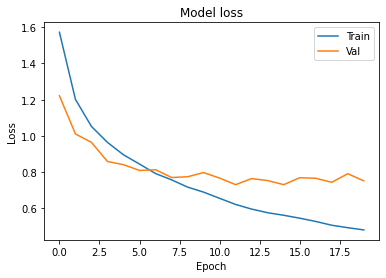

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

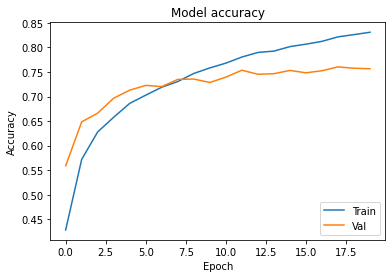

In [57]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
hist.history

In [62]:
model.evaluate(X_test, y_test_one_hot)

ERROR! Session/line number was not unique in database. History logging moved to new session 71
313/313 [==============================] - 1s 2ms/step - loss: 0.7872 - accuracy: 0.7474


[0.7871791124343872, 0.7473999857902527]

In [64]:
model.evaluate(X_test, y_test_one_hot)[1] #model accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.7872 - accuracy: 0.7474


0.7473999857902527

In [0]:
model.save('my_cifar10_model.h5')

In [0]:
#from keras.models import load_model
#model = load_model('my_cifar10_model.h5')

# Part 3

In [0]:
my_image = plt.imread("cat.jpg")
my_image = plt.imread("cat2.jpg")

In [83]:
my_image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]]

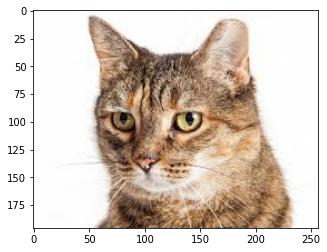

In [84]:
plt.imshow(my_image)

In [0]:
from skimage.transform import resize


In [0]:
my_image_resized = resize(my_image, (32,32,3))

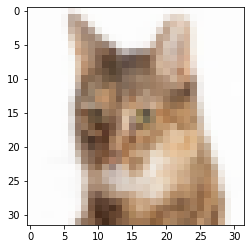

In [87]:
plt.imshow(my_image_resized)

In [88]:
my_image_resized

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0

In [0]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [90]:
probabilities

array([[3.7375876e-06, 1.5621601e-10, 2.3536931e-03, 9.7272158e-01,
        1.7880826e-05, 2.3953225e-03, 2.2501681e-02, 5.1285883e-06,
        7.3649210e-07, 2.2118016e-07]], dtype=float32)

In [91]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.9727216
Second most likely class: frog -- Probability: 0.022501681
Third most likely class: dog -- Probability: 0.0023953225
Fourth most likely class: bird -- Probability: 0.0023536931
Fifth most likely class: deer -- Probability: 1.7880826e-05
